# Data Set Red Wine Quality
Data set didapatkan dari UCI Machine Learning, terdapat 12 variabel dengan jumlah data sebanyak 1599.
* X = (Fixed Acidity, Violate Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Toral Sulfur Dioxide, Density, pH, Sulphates, Alcohol)
* Y = (Quality)

Pada data tidak terdapat missing value

# DATA

In [36]:
#import pandas and numpy
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from scipy import interp

In [37]:
#import dataset
data = pd.read_excel(r'C:\Users\Charles\Documents\Kuliah\Semester 7\Data Mining\Tugas Kamis Pagi Max\data12.xlsx')
data.head() #head of data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [39]:
data.describe() #descriptive statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [41]:
np.sum(data.isnull()) #number of NA for each variable

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Membagi Wine Quality Menjadi Kategori Baik dan Buruk

In [43]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Eksplorasi

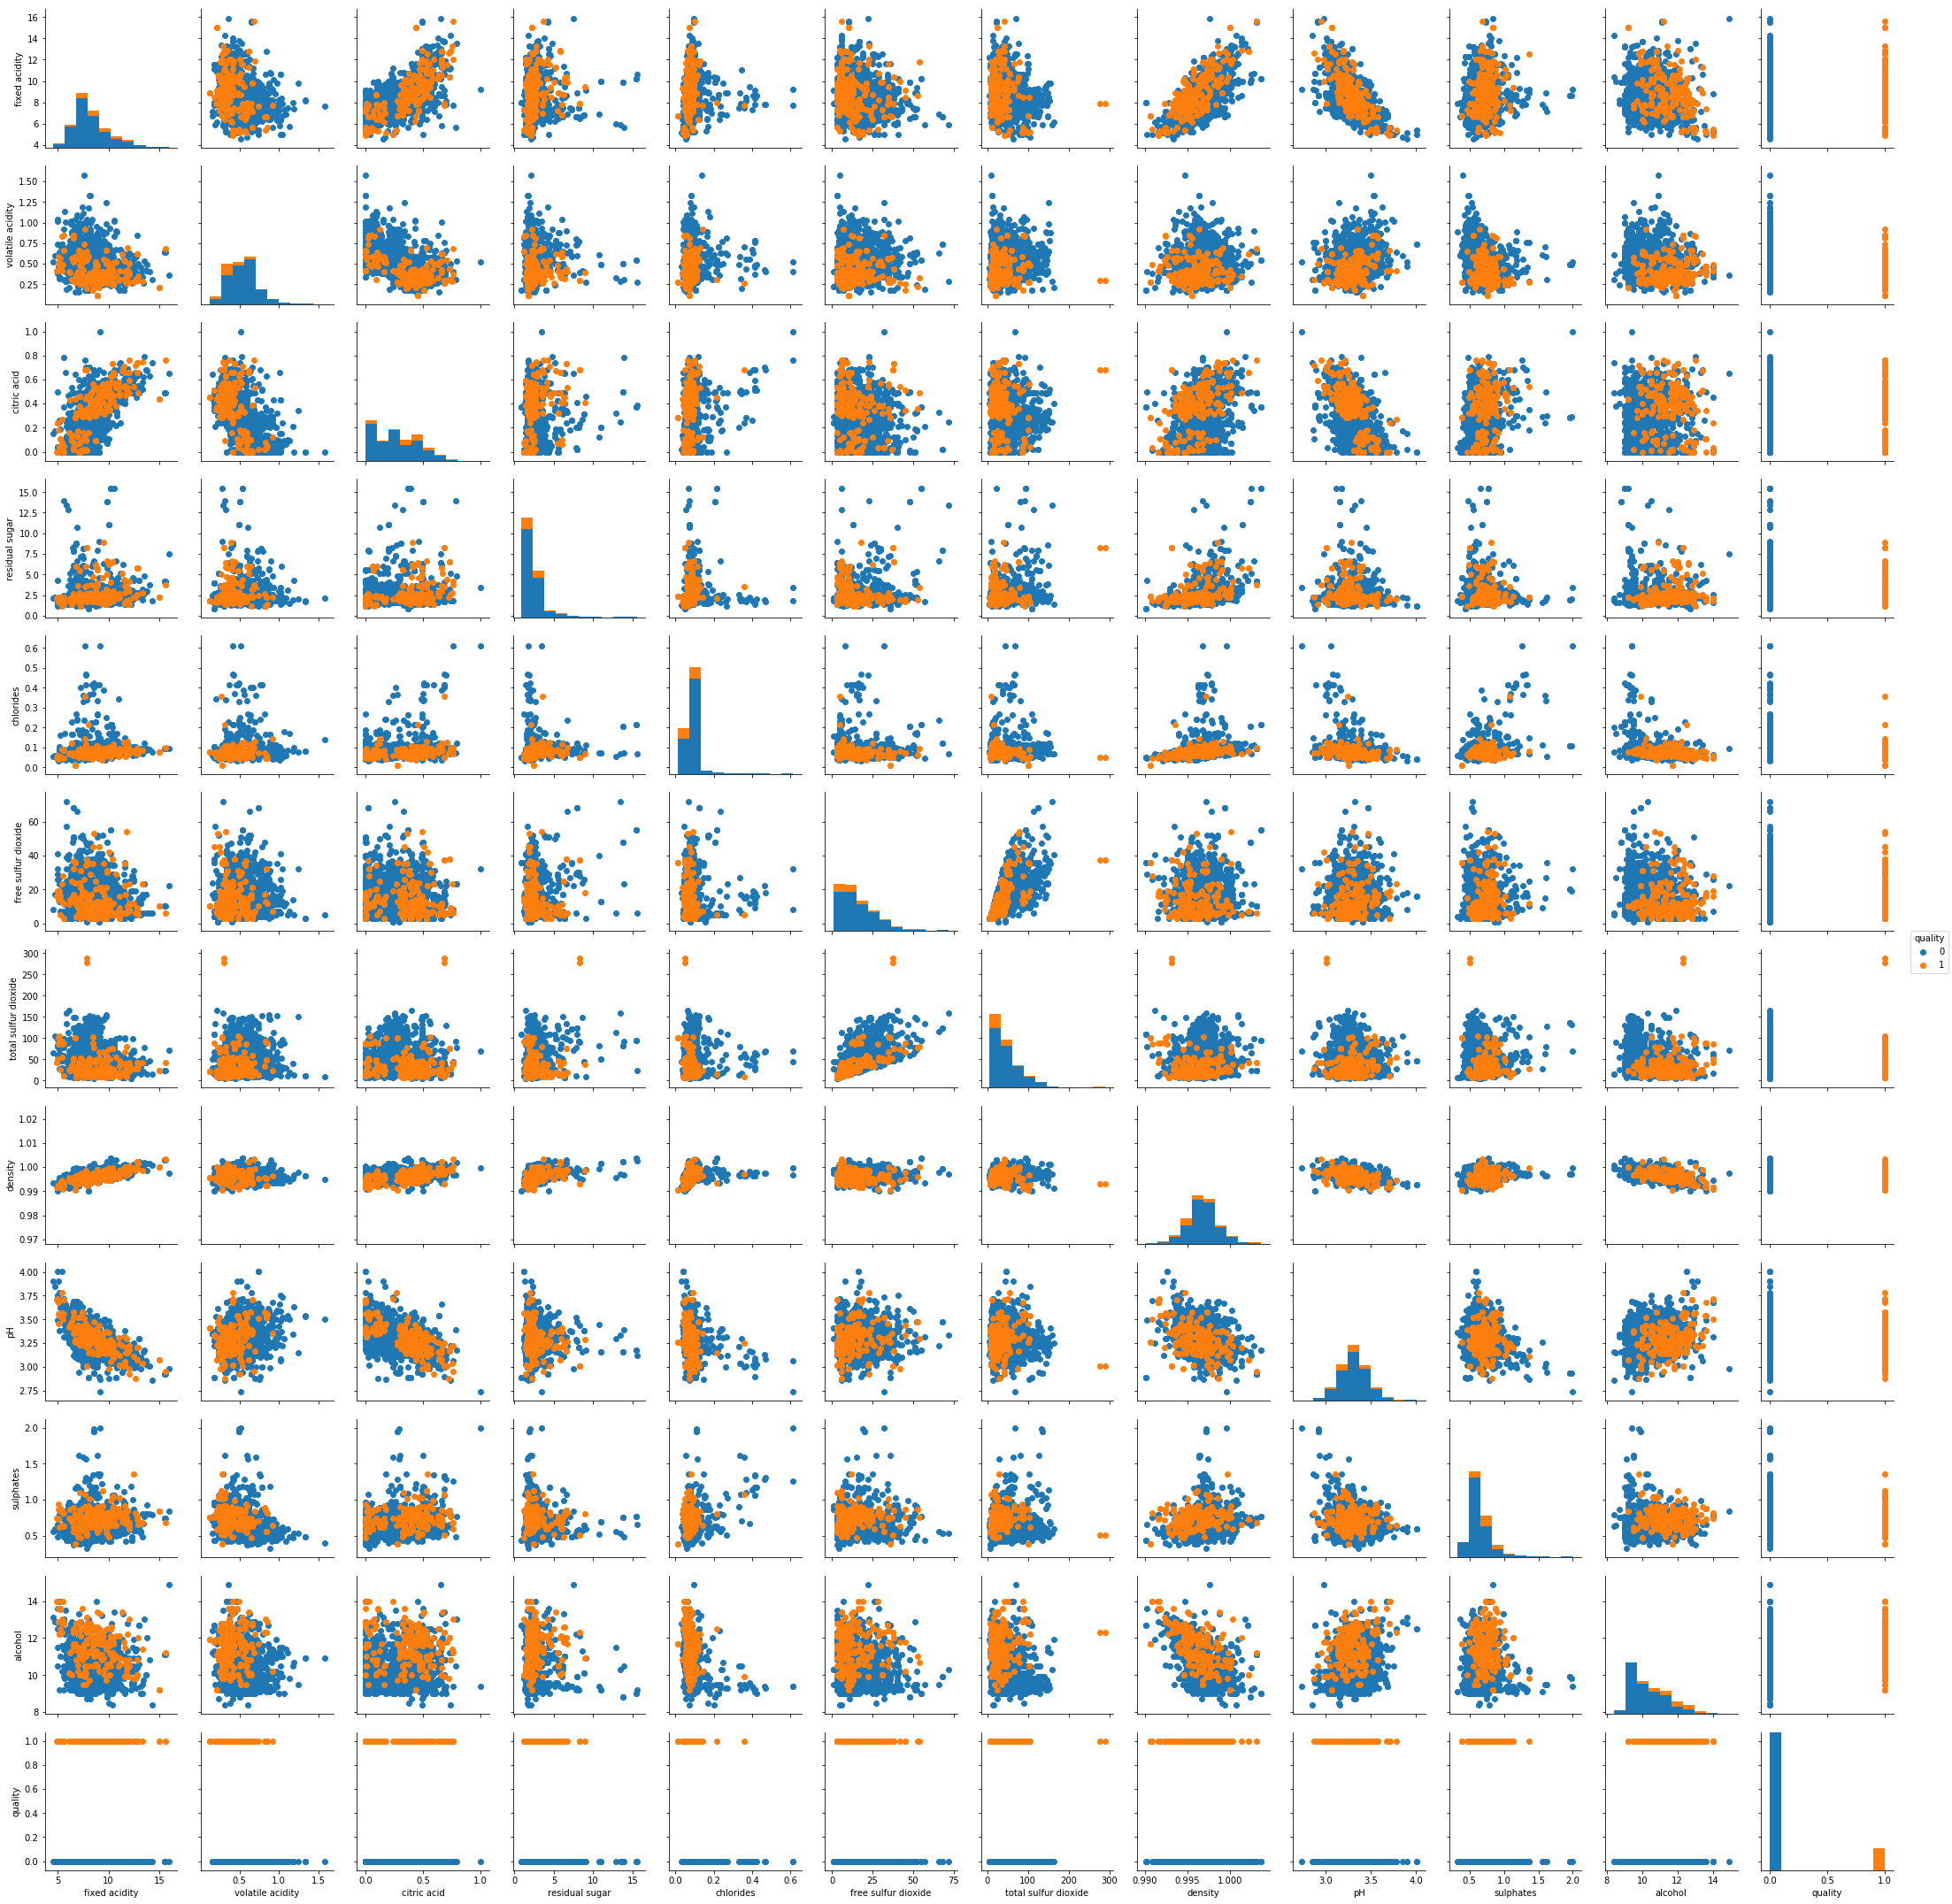

In [44]:
g = sns.PairGrid(data, hue="quality")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

# Korelasi Antar Variabel

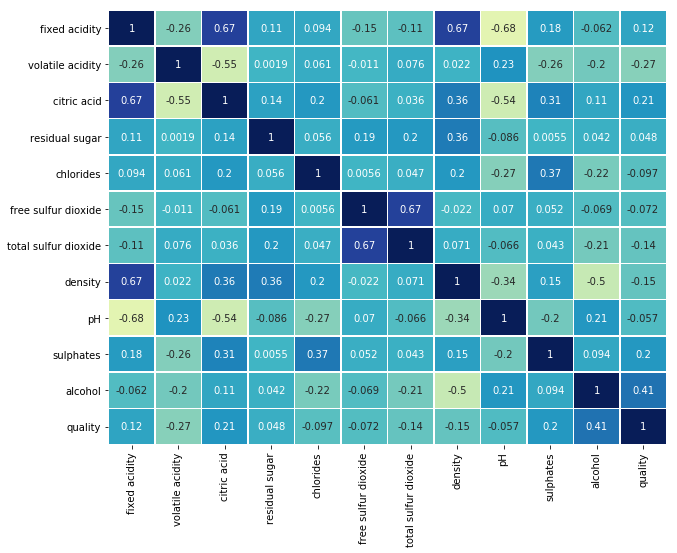

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

# KLASIFIKASI

# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [47]:
nb= GaussianNB()
y = data['quality']
X = data.drop(['quality'], axis=1)
sk_fold = StratifiedKFold(n_splits=5, shuffle=False, random_state=123)
akurasi = cross_val_score(nb, X, y, cv=sk_fold, scoring='accuracy')
presisi = cross_val_score(nb, X, y, cv=sk_fold, scoring='precision')
recallss = cross_val_score(nb, X, y, cv=sk_fold, scoring='recall')
AUCscore = cross_val_score(nb, X,y, cv=sk_fold, scoring='roc_auc')

In [48]:
print(akurasi)
print(presisi)
print(recallss)
print(AUCscore)

[0.87227414 0.69781931 0.90282132 0.70219436 0.86833856]
[0.57142857 0.29457364 0.63636364 0.26785714 0.51162791]
[0.27272727 0.86363636 0.65116279 0.69767442 0.51162791]
[0.85338037 0.79947489 0.90672396 0.77755308 0.88877654]


In [49]:
print(np.mean(akurasi))
print(np.mean(presisi))
print(np.mean(recallss))
print(np.mean(AUCscore))

0.8086895379837694
0.4563701802073895
0.5993657505285412
0.8451817713921068


### ROC Curve

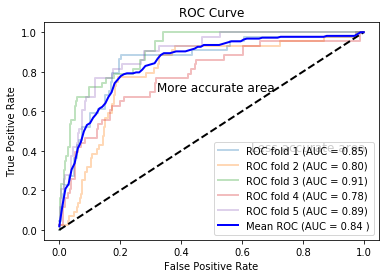

In [50]:
clf = GaussianNB()
cv = StratifiedKFold(n_splits=5, shuffle=False)
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
random_state = np.random.RandomState(123)
rfc= RandomForestClassifier(random_state=random_state)
sk_fold = StratifiedKFold(n_splits=5, shuffle=False, random_state=random_state)
akurasi = cross_val_score(rfc, X, y, cv=sk_fold, scoring='accuracy')
presisi = cross_val_score(rfc, X, y, cv=sk_fold, scoring='precision')
recallss = cross_val_score(rfc, X, y, cv=sk_fold, scoring='recall')
AUCscore = cross_val_score(rfc, X,y, cv=sk_fold, scoring='roc_auc')

In [53]:
print(akurasi)
print(presisi)
print(recallss)
print(AUCscore)

[0.8847352  0.86604361 0.87460815 0.85893417 0.88087774]
[1.         0.51282051 0.6        0.47058824 0.63157895]
[0.15909091 0.45454545 0.20930233 0.37209302 0.27906977]
[0.77129143 0.83865277 0.79259353 0.78020728 0.82667678]


In [54]:
print(np.mean(akurasi))
print(np.mean(presisi))
print(np.mean(recallss))
print(np.mean(AUCscore))

0.8730397757790603
0.6429975390966103
0.2948202959830867
0.8018843588410267


### ROC Curve

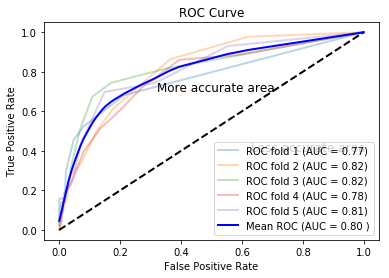

In [55]:
random_state = np.random.RandomState(123)
clf = RandomForestClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5,shuffle=False)
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

# Analisis
#### Klasifikasi menggunakan Naive Bayes, menghasilkan nilai :
* akurasi sebesar 0.8086895379837694
* presisi sebesar 0.4563701802073895
* recallss sebesar 0.5993657505285412
* AUC score sebesar 0.8451817713921068 

#### Klasifikasi menggunakan Random Forest, menghasilkan nilai :
* akurasi sebesar 0.8730397757790603
* presisi sebesar 0.6429975390966103
* recallss sebesar 0.2948202959830867
* AUC score sebesar 0.8018843588410267

## Berdasarkan hasil klasifikasi dengan menggunakan Naive Bayes dan Random Forest, didapatkan akurasi yang lebih besar dengan metode Random Forest dengan nilai 0.8730 atau 87.3%